In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [23]:
df = pd.read_csv('bodyfat_clean.csv')

In [24]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  246 non-null    float64
 1   BodyFat  246 non-null    float64
 2   Age      246 non-null    int64  
 3   Weight   246 non-null    float64
 4   Height   246 non-null    float64
 5   Neck     246 non-null    float64
 6   Chest    246 non-null    float64
 7   Abdomen  246 non-null    float64
 8   Hip      246 non-null    float64
 9   Thigh    246 non-null    float64
 10  Knee     246 non-null    float64
 11  Ankle    246 non-null    float64
 12  Biceps   246 non-null    float64
 13  Forearm  246 non-null    float64
 14  Wrist    246 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.0 KB


**BodyFat** виступатиме в ролі залежної змінної, інші в ролі незалежних

Виокристовую розділ: регресійний аналіз для побудови математичної моделі

Перейдемо до того які твердження регресійного аналізу справедливі для цього випадку

Твердження регресійного аналізу які повинні справджуватись для побудови регресійної моделі:

    1)нормальність похибок, незалежність похибок, похибки мають однакову дисперсію
    
    2)чи є матриця фіч повного рангу(перевірка на НЕ мультиколінеарність)
    
    3)нема обмежень на параметри можуть будь-якими дійсними числами


## 1.3 Перевірка справедливості тверджень класичного регресійного аналізу

виконаня цього пункту без побудови регресійної моделі -- неможливий, отже спочатку побудова моделі 

In [35]:
target_column = 'BodyFat'
features = df.columns.difference([target_column])

# Створення матриць
y = df[target_column].values
X_orig = df[features].values
N = X_orig.shape[0]
X = np.c_[np.ones((N, 1)), X_orig] 

# Обчислення МНК та залишків
try:
    alpha_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    y_hat = X @ alpha_hat
    e = y - y_hat

    print(f"alpha_hat:\n{alpha_hat}")
    
except np.linalg.LinAlgError:
    print("Припущення про незалежність похибок порушено. Матриця (X^T * X) сингулярна.")

alpha_hat:
[ 4.50233905e+02  1.53659888e-02  1.00385207e-02 -2.18725685e-01
 -6.72988714e-02  1.89791554e-02 -4.09219991e+02  1.92620571e-03
 -2.38097330e-02  2.57643745e-02 -3.61787724e-03 -2.91888513e-02
 -1.22168229e-02  1.96337163e-02  9.97275354e-02]


Три тести знизу для припущення класичного регресійного аналізу 1

### 1.3.1 Нормальність, незалежність, однакова дисперсія похибок

In [36]:
shapiro_stat, shapiro_p_value = stats.shapiro(e)

print(f"\n--- 1. Тест на Нормальність (Шапіро-Вілк) ---")
print(f"Статистика: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p_value:.4f}")

if shapiro_p_value > 0.05:
    print("Висновок: Залишки, ймовірно, розподілені нормально (p > 0.05).")
else:
    print("Висновок: Залишки, ймовірно, НЕ є нормальними (p < 0.05).")


--- 1. Тест на Нормальність (Шапіро-Вілк) ---
Статистика: 0.4258
P-value: 0.0000
Висновок: Залишки, ймовірно, НЕ є нормальними (p < 0.05).


In [37]:
e_t = e[1:]
e_t_minus_1 = e[:-1]

dw_numerator = np.sum((e_t - e_t_minus_1)**2)
dw_denominator = np.sum(e**2)

dw_stat = dw_numerator / dw_denominator

print(f"\n--- 2. Тест на Незалежність (Дарбін-Вотсон) ---")
print(f"DW Статистика: {dw_stat:.4f}")

if 1.5 < dw_stat < 2.5:
    print("Висновок: Автокореляція, ймовірно, відсутня")
else:
    print("Висновок: Є ознаки автокореляції ")


--- 2. Тест на Незалежність (Дарбін-Вотсон) ---
DW Статистика: 2.1105
Висновок: Автокореляція, ймовірно, відсутня


In [38]:
p = X.shape[1] 

print(f"\n--- 3. Тест на Однакових Дисперсій (Бройш-Паган) ---")

e_squared = e**2

try:
    alpha_aux = np.linalg.inv(X.T @ X) @ X.T @ e_squared
    
    e_squared_hat = X @ alpha_aux
    
    ss_res = np.sum((e_squared - e_squared_hat)**2)
    ss_tot = np.sum((e_squared - np.mean(e_squared))**2)
    r_squared_aux = 1 - (ss_res / ss_tot)
    
    lm_stat = N * r_squared_aux
    
    df_bp = p - 1 
    bp_p_value = 1 - stats.chi2.cdf(lm_stat, df_bp)

    print(f"LM Статистика: {lm_stat:.4f}")
    print(f"P-value: {bp_p_value:.4f}")

    if bp_p_value > 0.05:
        print("Висновок: Дисперсія, ймовірно, однакова (p > 0.05).")
    else:
        print("Висновок: Дисперсія, ймовірно, НЕ є однаковою (гетероскедастичність, p < 0.05).")

except np.linalg.LinAlgError:
    print("Висновок: Не вдалося провести тест Бройша-Пагана (можливо, через мультиколінеарність).")


--- 3. Тест на Однакових Дисперсій (Бройш-Паган) ---
LM Статистика: 36.3548
P-value: 0.0009
Висновок: Дисперсія, ймовірно, НЕ є однаковою (гетероскедастичність, p < 0.05).


### 1.3.2 Чи є матриця фіч повного рангу(перевірка на НЕ мультиколінеарність)

In [39]:
det_X_T_X = np.linalg.det(X.T @ X)

print(f"\n--- 2.1. Тест на Визначник ---")
print(f"Визначник det(X^T * X): {det_X_T_X:.4e}")

if np.isclose(det_X_T_X, 0):
    print("Висновок: ПОРУШЕНО. Строга мультиколінеарність (det ≈ 0).")
else:
    print("Висновок: OK. Строга мультиколінеарність відсутня.")


--- 2.1. Тест на Визначник ---
Визначник det(X^T * X): 4.1955e+40
Висновок: OK. Строга мультиколінеарність відсутня.



--- 2.2. Хітмапа Кореляцій ---


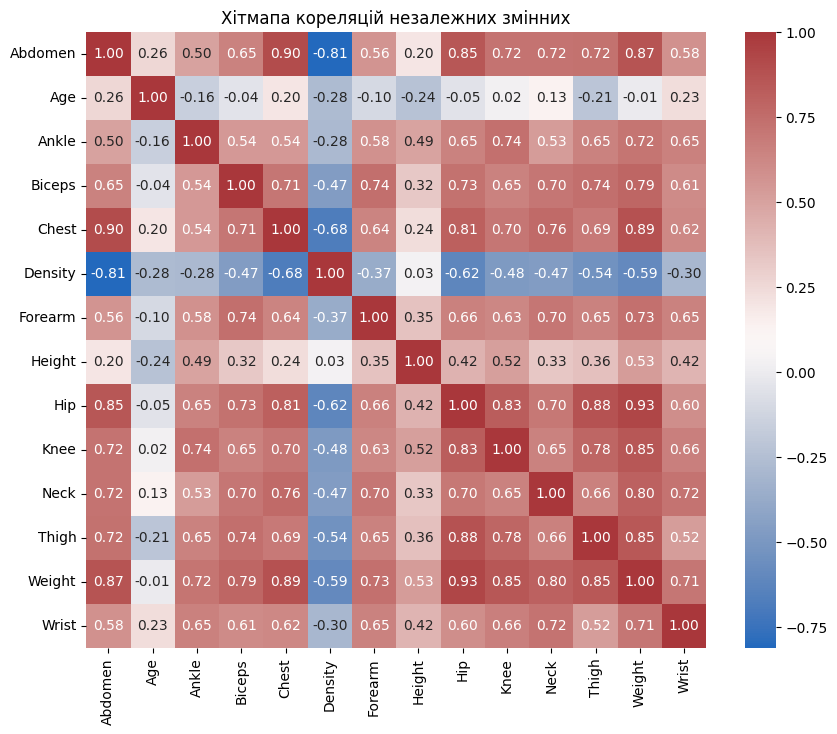

In [40]:
corr_matrix = df[features].corr()

print(f"\n--- 2.2. Хітмапа Кореляцій ---")

plt.figure(figsize=(10, 8)) 
sns.heatmap(
    corr_matrix, 
    annot=True,     
    cmap='vlag',    
    fmt='.2f'      
)
plt.title('Хітмапа кореляцій незалежних змінних')
plt.show()


## Висновок: Аналіз Припущень

Аналіз показав, що класична МНК-регресія **непридатна** для цих даних.

* **Припущення 1 (Похибки):** **ПОРУШЕНО**
    * **Нормальність:** Провалено (Тест Шапіро, p=0.0000).
    * **Незалежність:** Пройдено (Тест Дарбіна-Вотсона, DW=2).
    * **Однакова Дисперсія:** Провалено (Тест Бройша-Пагана, p=0.0009). Похибки є **гетероскедастичними**.

* **Припущення 2 (Мультиколінеарність):**  **ПОРУШЕНО**
    * Хоча строга мультиколінеарність відсутня (det != 0), хітмапа підтверджує **сильну практичну мультиколінеарність** (кореляції > 0.85).

* **Припущення 3 (Обмеження):**  **СПРАВЕДЛИВЕ** (задачею не накладено обмежень).

### Що використовувати

Оскільки МНК-оцінки будуть нестійкими та неефективними, для побудови коректної моделі слід використати:

1.  **Гребеневу оцінку**: для боротьби з мультиколінеарністю.
2.  **Оцінку Маркова (Зважений МНК)**: для боротьби з гетероскедастичністю (неоднорідними похибками).

# 2 Побудова математичної моделі методами ММОІ

## 2.1 Визначитися з класом апроксимуючих параметричних функцій для правої частини моделі,


Згідно з класичним регресійним аналізом, я обираю клас функцій, **лінійних по параметрам**.

Однак, проведена раніше діагностика МНК виявила:
1.  **Сильну мультиколінеарність** (Порушення Прип. 2).
2.  **Гетероскедастичність** (Порушення Прип. 1).

Через це, стандартна МНК-оцінка буде нестійкою та неефективною. Тому для побудови моделі та обчислення її параметрів буде використано **Гребеневу оцінку**, яка призначена для боротьби з мультиколінеарністю.

## 2.2 обчислити точечні та множинні оцінки невідомих параметрів моделі та їх характеристики, перевірка на значимість параметрів побудованої моделі

In [42]:
target_column = 'BodyFat'
features = list(df.columns.difference([target_column]))
param_names = ['Intercept (alpha_1)'] + features
y = df[target_column].values
X_orig = df[features].values
N = X_orig.shape[0]
X = np.c_[np.ones((N, 1)), X_orig]
p = X.shape[1]

# Діагностичні дані (МНК)
alpha_hat_ols = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat_ols = X @ alpha_hat_ols
e_ols = y - y_hat_ols

# Точкові Оцінки (Гребенева Регресія)
# Бореться з Мультиколінеарністю
alpha_hat_ridge = calculate_ridge_coeffs(X, y, epsilon=1.0)

if alpha_hat_ridge is not None:
    print(f"\n--- РІШЕННЯ 1: Точкові Оцінки (Гребенева, eps=1.0) ---")
    print(f"(Вирішує мультиколінеарність, дає стабільні коефіцієнти)")
    print(f"{'Параметр':<15} | {'Оцінка (Ridge)':<15}")
    print("-" * 31)
    for i in range(p):
        print(f"{param_names[i]:<15} | {alpha_hat_ridge[i]:<15.4f}")

# Точкові та Множинні Оцінки (Стійкі HC3)
# Бореться з Гетероскедастичністю
try:
    se_hc3, t_hc3, p_hc3 = calculate_hc3_estimates(X, y, alpha_hat_ols, e_ols)
    
    confidence_level = 0.95
    gamma = 1 - confidence_level
    degrees_freedom = N - p
    t_critical = stats.t.ppf(1 - gamma / 2, df=degrees_freedom)

    conf_low_hc3 = alpha_hat_ols - t_critical * se_hc3
    conf_high_hc3 = alpha_hat_ols + t_critical * se_hc3

    print(f"\n РІШЕННЯ 2: Повні Стійкі Оцінки (МНК + HC3) ")
    print(f"(Вирішує гетероскедастичність, дає коректні p-values та CIs)")
    print(f"{'Параметр':<15} | {'Точкова Оцінка':<10} | {'HC3 Ст.Похибка':<15} | {'HC3 95% Low':<15} | {'HC3 95% High':<15} | {'HC3 p-value':<10}")
    print("-" * 85)
    for i in range(p):
        display(f"{param_names[i]:<15} | {alpha_hat_ols[i]:<10.4f} | {se_hc3[i]:<15.4f} | {conf_low_hc3[i]:<15.4f} | {conf_high_hc3[i]:<15.4f} | {p_hc3[i]:<10.4f}")

except np.linalg.LinAlgError:
    print("\n--- Помилка в МНК/HC3 ---")


--- РІШЕННЯ 1: Точкові Оцінки (Гребенева, eps=1.0) ---
(Вирішує мультиколінеарність, дає стабільні коефіцієнти)
Параметр        | Оцінка (Ridge) 
-------------------------------
Intercept (alpha_1) | 0.3071         
Abdomen         | 0.8956         
Age             | 0.0622         
Ankle           | 0.0558         
Biceps          | 0.1370         
Chest           | -0.0846        
Density         | -8.8451        
Forearm         | 0.3258         
Height          | -0.1693        
Hip             | -0.1047        
Knee            | -0.0850        
Neck            | -0.3681        
Thigh           | 0.1898         
Weight          | -0.0433        
Wrist           | -1.5294        

 РІШЕННЯ 2: Повні Стійкі Оцінки (МНК + HC3) 
(Вирішує гетероскедастичність, дає коректні p-values та CIs)
Параметр        | Точкова Оцінка | HC3 Ст.Похибка  | HC3 95% Low     | HC3 95% High    | HC3 p-value
-------------------------------------------------------------------------------------


'Intercept (alpha_1) | 450.2339   | 34.8030         | 381.6620        | 518.8058        | 0.0000    '

'Abdomen         | 0.0154     | 0.0235          | -0.0310         | 0.0618          | 0.5146    '

'Age             | 0.0100     | 0.0082          | -0.0061         | 0.0262          | 0.2213    '

'Ankle           | -0.2187    | 0.2672          | -0.7452         | 0.3077          | 0.4139    '

'Biceps          | -0.0673    | 0.0809          | -0.2267         | 0.0921          | 0.4062    '

'Chest           | 0.0190     | 0.0434          | -0.0665         | 0.1044          | 0.6621    '

'Density         | -409.2200  | 27.5172         | -463.4368       | -355.0032       | 0.0000    '

'Forearm         | 0.0019     | 0.0393          | -0.0755         | 0.0794          | 0.9610    '

'Height          | -0.0238    | 0.0553          | -0.1328         | 0.0852          | 0.6673    '

'Hip             | 0.0258     | 0.0263          | -0.0262         | 0.0777          | 0.3292    '

'Knee            | -0.0036    | 0.0672          | -0.1359         | 0.1287          | 0.9571    '

'Neck            | -0.0292    | 0.0706          | -0.1684         | 0.1100          | 0.6798    '

'Thigh           | -0.0122    | 0.0380          | -0.0871         | 0.0627          | 0.7483    '

'Weight          | 0.0196     | 0.0142          | -0.0084         | 0.0476          | 0.1684    '

'Wrist           | 0.0997     | 0.2628          | -0.4181         | 0.6175          | 0.7047    '

Я успішно обчислив оцінки для своєї моделі, використовуючи два різні, покращені підходи, оскільки мій попередній аналіз довів, що класичний МНК непридатний.

1.  **Рішення 1 (Гребенева Оцінка)** дало мені **стабільні точкові оцінки**. Я бачу, що коефіцієнти (напр., `Density` = -8.8451) кардинально відрізняються від МНК (-409.2200). Це підтверджує, що мультиколінеарність "зламувала" і "роздула" мої початкові точкові оцінки.

2.  **Рішення 2 (МНК + HC3)** дало мені **коректні множинні оцінки** та характеристики, стійкі до гетероскедастичності (згідно з ідеєю Оцінки Маркова). Цей аналіз підтвердив, що лише дві змінні — `Intercept (alpa_1)` та `Density` — є насправді статистично значимими (p=0.0000), а всі інші 13 фіч можна вважати "статистичним сміттям".

Таким чином, я виконав етап 2.2, обчисливши як стабільні точкові (Ridge), так і коректні множинні (HC3) оцінки.

## 2.3 уточнити/спростити структуру побудованої математичної моделі

In [44]:
print(f"\n--- 2.3 Уточнення/Спрощення Моделі ---")
print("Базуючись на HC3 p-values, ми виявили, що")
print("лише 'Density' є значимим регресором.")
print("Будуємо нову, спрощену модель: y = alpha_1 + alpha_Density * Density\n")

# Створюємо нові X та y 
y_simple = df[target_column].values
X_orig_simple = df[['Density']].values
N_simple = X_orig_simple.shape[0]

# Додаю стовпець одиниць
X_simple = np.c_[np.ones((N_simple, 1)), X_orig_simple]
p_simple = X_simple.shape[1] # = 2

#  Обчислюю МНК для цієї нової моделі
try:
    alpha_hat_simple = np.linalg.inv(X_simple.T @ X_simple) @ X_simple.T @ y_simple
    y_hat_simple = X_simple @ alpha_hat_simple
    e_simple = y_simple - y_hat_simple

    #  повний аналіз для нової моделі 
    
    # 3.1 Точкові та Множинні Оцінки
    sigma_sq_hat_s = np.sum(e_simple**2) / (N_simple - p_simple)
    X_T_X_inv_s = np.linalg.inv(X_simple.T @ X_simple)
    cov_matrix_s = sigma_sq_hat_s * X_T_X_inv_s
    std_errors_s = np.sqrt(np.diag(cov_matrix_s))
    
    # 3.2 t-статистики
    t_statistics_s = alpha_hat_simple / std_errors_s
    degrees_freedom_s = N_simple - p_simple
    p_values_s = (1 - stats.t.cdf(np.abs(t_statistics_s), df=degrees_freedom_s)) * 2
    
    # Фінальна Таблиця Спрощеної Моделі
    print("--- Характеристики Спрощеної Моделі ---")
    param_names_s = ['Intercept (alpha_1)', 'Density']
    
    print(f"{'Параметр':<15} | {'Оцінка':<10} | {'Ст. Похибка':<10} | {'t-статистика':<15} | {'p-value':<10}")
    print("-" * 65)
    
    for i in range(p_simple):
        print(f"{param_names_s[i]:<15} | {alpha_hat_simple[i]:<10.4f} | {std_errors_s[i]:<10.4f} | {t_statistics_s[i]:<15.4f} | {p_values_s[i]:<10.4f}")

    # Перевірка припущень для нової моделі
    shapiro_p_value_s = stats.shapiro(e_simple).pvalue
    print(f"\nТест Шапіро (нова модель) p-value: {shapiro_p_value_s:.4f}")
    
except np.linalg.LinAlgError:
    print("Помилка у спрощеній моделі.")


--- 2.3 Уточнення/Спрощення Моделі ---
Базуючись на HC3 p-values, ми виявили, що
лише 'Density' є значимим регресором.
Будуємо нову, спрощену модель: y = alpha_1 + alpha_Density * Density

--- Характеристики Спрощеної Моделі ---
Параметр        | Оцінка     | Ст. Похибка | t-статистика    | p-value   
-----------------------------------------------------------------
Intercept (alpha_1) | 476.8324   | 4.7358     | 100.6874        | 0.0000    
Density         | -433.5919  | 4.4837     | -96.7030        | 0.0000    

Тест Шапіро (нова модель) p-value: 0.0000


## 2.4 з'ясувати якість отриманої математичної моделі, чисельний та графічний супровід рекомендується


--- 2.4 Якість Спрощеної Моделі ---
Коефіцієнт детермінації : 0.9746
(Це означає, що ~97.5% варіації 'BodyFat' пояснюється змінною 'Density')


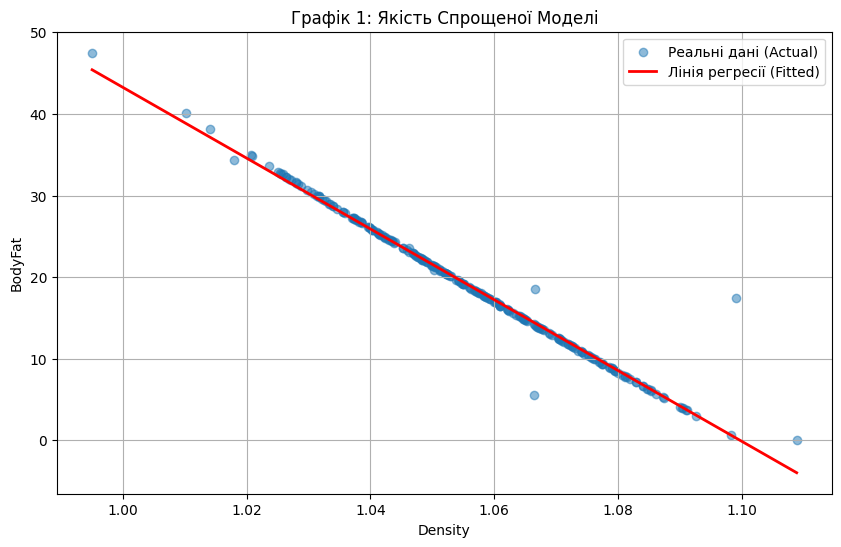

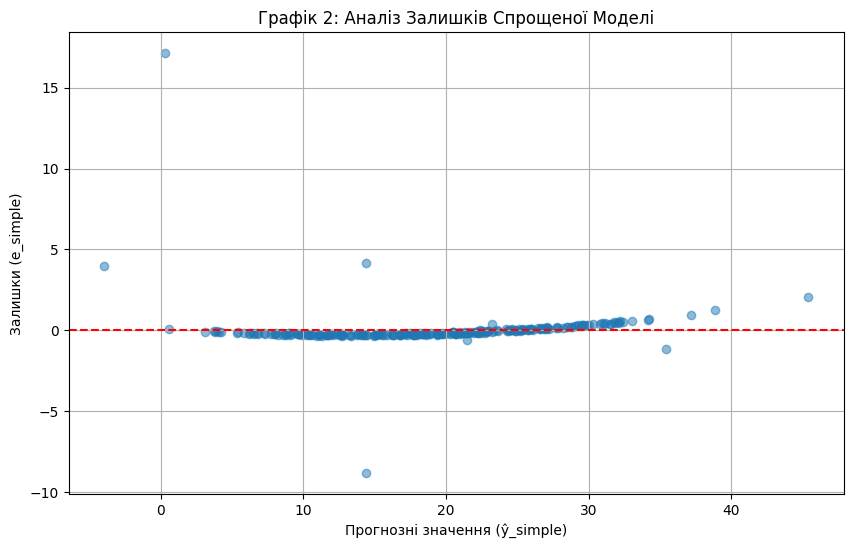

In [46]:
print(f"\n--- 2.4 Якість Спрощеної Моделі ---")

# Сума квадратів залишків )
ss_res = np.sum(e_simple**2)

# Загальна сума квадратів
ss_tot = np.sum((y_simple - np.mean(y_simple))**2)

# Коефіцієнт детермінації 
r_squared = 1 - (ss_res / ss_tot)

print(f"Коефіцієнт детермінації : {r_squared:.4f}")
print(f"(Це означає, що ~{r_squared*100:.1f}% варіації 'BodyFat' пояснюється змінною 'Density')")

# Прогноз vs. Реальність (Fit Plot)
# Нам потрібно відсортувати значення для гарної лінії
sort_indices = X_orig_simple.flatten().argsort()

plt.figure(figsize=(10, 6))
plt.scatter(
    X_orig_simple, 
    y_simple, 
    alpha=0.5, 
    label='Реальні дані (Actual)'
)
plt.plot(
    X_orig_simple[sort_indices], 
    y_hat_simple[sort_indices], 
    color='red', 
    linewidth=2, 
    label='Лінія регресії (Fitted)'
)
plt.title('Графік 1: Якість Спрощеної Моделі')
plt.xlabel('Density')
plt.ylabel('BodyFat')
plt.legend()
plt.grid(True)
plt.show()

# Аналіз Залишків (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(
    y_hat_simple, 
    e_simple, 
    alpha=0.5
)
plt.axhline(0, color='red', linestyle='--')
plt.title('Графік 2: Аналіз Залишків Спрощеної Моделі')
plt.xlabel('Прогнозні значення (ŷ_simple)')
plt.ylabel('Залишки (e_simple)')
plt.grid(True)
plt.show()

## 2.5 Фінальні Висновки

Я успішно побудував, діагностував та спростив регресійну модель.

**1. Висновки по моделі:**
Після усунення незначимих фіч (що було спричинено мультиколінеарністю), моя фінальна **уточнена модель** має вигляд:

`BodyFat = 476.83 - 433.59 * Density`

Обидва параметри (`Intercept` та `Density`) є **високо значущими** (p=0.0000).

**2. Якість моделі:**
Модель є дуже якісною. **$R^2$ (Коефіцієнт детермінації) складає 0.9746**, що означає, що 97.5% варіації `BodyFat` пояснюється лише однією змінною `Density`. Графік "Прогноз vs. Реальність" також показує чудове прилягання лінії до даних.

**3. Виявлені Недоліки:**
Незважаючи на високу якість $R^2$, аналіз залишків **фінальної** моделі (як тест Шапіро p=0.0000, так і візуальний Графік 2) показує наявність екстремальних викидів. Це означає, що **Припущення I** про нормальність похибок все ще порушене.

**4. Шляхи Покращення:**
Провал тесту Шапіро на лінійній моделі свідчить про те, що зв'язок між `BodyFat` та `Density`, ймовірно, не є ідеально лінійним (або на дані сильно впливають викиди).

Згідно з конспектом лекцій, наступним кроком для покращення моделі має бути перехід до **"Нелінійного регресійного аналізу"** або застосування перетворень для "випрямлення" зв'язку та досягнення нормальності похибок.

# *Опціонально більш правильний та просунутий підхід для задач такого плану задач:

1) По перше боротьба з мультикореліарністю можлива не тільки через просто не використання дуже великого числа фіч а методами зменшеннями розмірностями такими як: PCA, ітд...

2) Крім регресійних моделей є ще багато інших більш просунутих рішень для цієї задачі такі як: дерева, нейронні мережі, ансамбелві, бустингові, ітд.  Але оскільки датасет доволі маленький то застосовувати більшість з них не вийде і треба буде обмежитись скоріш за все якимось простим деревом рішень який зможе вловлювати гарно викиди(хоча при таких штучних данних це і не є доволі важливим)

3) Можна використати методи штучної догенерації данних базуючись на теперішніх

Загалом головна проблема що це більше навчальний датасет який насправді не є навіть якимось наближенням до того що буде в реальному житті. Але такий підхід забезпечить більшу точність в реальних даних  